In [63]:
import sklearn
import numpy as np
import pandas as pd
import random
from sklearn.datasets import load_iris
from rfgap import RFGAP
from sklearn.utils import resample
import seaborn as sns


In [52]:
#load dataset
iris_data = load_iris()
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris['label'] = iris_data.target

In [53]:
#downsample 2 classes of iris so that the dataset is imbalanced
class_0 = iris[iris['label'] == 0]
class_1 = iris[iris['label'] == 1]
class_2 = iris[iris['label'] == 2]

class_0_downsampled = resample(class_0, replace=False, n_samples=20, random_state=42)
class_1_downsampled = resample(class_1, replace=False, n_samples=15, random_state=42)
class_2_downsampled = resample(class_2, replace=False, n_samples=50, random_state=42)

imbalanced_iris = pd.concat([class_0_downsampled, class_1_downsampled, class_2_downsampled])




In [54]:
x = imbalanced_iris.iloc[:, :-1]
y = imbalanced_iris.iloc[:, -1]

In [55]:
classCounts = y.value_counts()

majLabel = classCounts.index[0]
majCount = classCounts.iloc[0]

class1Label = classCounts.index[1]
class1Count = classCounts.iloc[1]
class1UpsampleSize = round(majCount - class1Count)

class2Label = classCounts.index[2]
class2Count = classCounts.iloc[2]
class2UpsampleSize = round(majCount - class2Count)

In [56]:
valueCounts = y.value_counts()
majLabel = valueCounts.index[0]
majCount = valueCounts.iloc[0]
classCounts = valueCounts.to_dict()
for label in classCounts:
    print(label, classCounts[label])
print(majCount - classCounts[1])


2 50
0 20
1 15
35


In [57]:
#Iris Example
def rfOverSample(x, y, numSamples=3):

    #Train RF:
    rf = RFGAP(y = y, prediction_type = 'classification', matrix_type = 'dense')
    rf.fit(x, y)
    prox = rf.get_proximities()

    valueCounts = y.value_counts()
    majLabel = valueCounts.index[0]
    majCount = valueCounts.iloc[0]
    classCounts = valueCounts.to_dict()

    numFeatures = x.shape[1]

    for label in classCounts:
        if label != majLabel:
            upsampleSize = majCount - classCounts[label]
            newPoints = np.zeros((upsampleSize, numFeatures))

            for i in range(upsampleSize):
                sampleIndices = np.where(y == label)[0]
                samples = np.random.choice(sampleIndices, numSamples, replace=True)
                newFeatures = np.sum((np.matmul(np.transpose(x.iloc[samples,:]), prox[samples, :])), axis=1)/numSamples
                newPoints[i, : ] = newFeatures
                # print(type(newPoints))
            x = pd.concat((x, pd.DataFrame(newPoints, columns = x.columns))).reset_index(drop = True)
            y = pd.concat((y, pd.Series(np.ones_like(newPoints[ : , 0]) * label))).reset_index(drop = True)
    
    return x, y

In [58]:
x_upsampled, y_upsampled = rfOverSample(x, y)

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

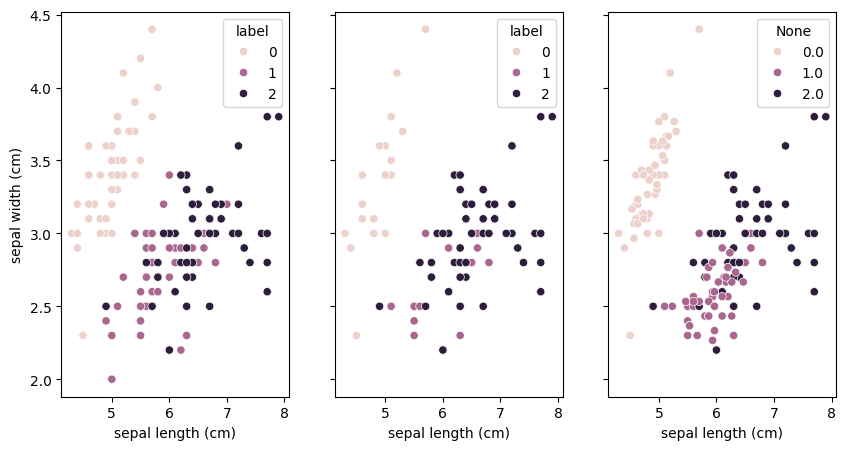

In [71]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3,  figsize = (10, 5), sharey = True)

sns.scatterplot(x = x.iloc[:, 0], y = x.iloc[:, 1], hue = y, ax = ax[2])
sns.scatterplot(data = iris, x = 'sepal length (cm)', y = 'sepal width (cm)', hue = 'label', ax = ax[0])
sns.scatterplot(data = imbalanced_iris, x = 'sepal length (cm)', y = 'sepal width (cm)', hue = 'label', ax = ax[1])


In [59]:
x.sort_index()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,4.300000,3.000000,1.100000,0.100000
1,5.100000,3.400000,1.500000,0.200000
2,4.800000,3.100000,1.600000,0.200000
3,4.800000,3.000000,1.400000,0.300000
4,5.100000,3.500000,1.400000,0.300000
...,...,...,...,...
145,5.233333,2.500000,3.333333,1.166667
146,6.266667,2.433333,4.333333,1.266667
147,6.233333,2.866667,4.666667,1.433333
148,5.866667,2.433333,4.166667,1.200000
